## PART 1

In [3]:
import numpy as np
import random

### Пошук максимального підмасиву

In [ ]:
data = np.random.randint(10, size=1000)

In [14]:
# Пошук максимального підмасиву
# 1
def find_max_subarray_brute(arr):
    n = len(arr)
    max_sum = float('-inf')
    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            max_sum = max(max_sum, current_sum)
    return max_sum

In [18]:
%%timeit

find_max_subarray_brute(data)

289 ms ± 45.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# 2
def find_max_subarray_divide(arr):
    if len(arr) == 1:
        return arr[0]
    mid = len(arr) // 2
    left_sum = find_max_subarray_divide(arr[:mid])
    right_sum = find_max_subarray_divide(arr[mid:])
    
    # Знаходження максимальної суми, що перетинає середину
    left_crossing = float('-inf')
    current = 0
    for i in range(mid-1, -1, -1):
        current += arr[i]
        left_crossing = max(left_crossing, current)
    
    right_crossing = float('-inf')
    current = 0
    for i in range(mid, len(arr)):
        current += arr[i]
        right_crossing = max(right_crossing, current)
    
    crossing_sum = left_crossing + right_crossing
    return max(left_sum, right_sum, crossing_sum)

In [19]:
%%timeit

find_max_subarray_divide(data)

17.7 ms ± 3.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


CPU times: user 283 ms, sys: 197 μs, total: 284 ms
Wall time: 292 ms


np.int64(4530)

CPU times: user 24.8 ms, sys: 12.6 ms, total: 37.4 ms
Wall time: 39.8 ms


np.int64(4530)

## PART 2

## COMPEX INSTANCES

## LEGACY

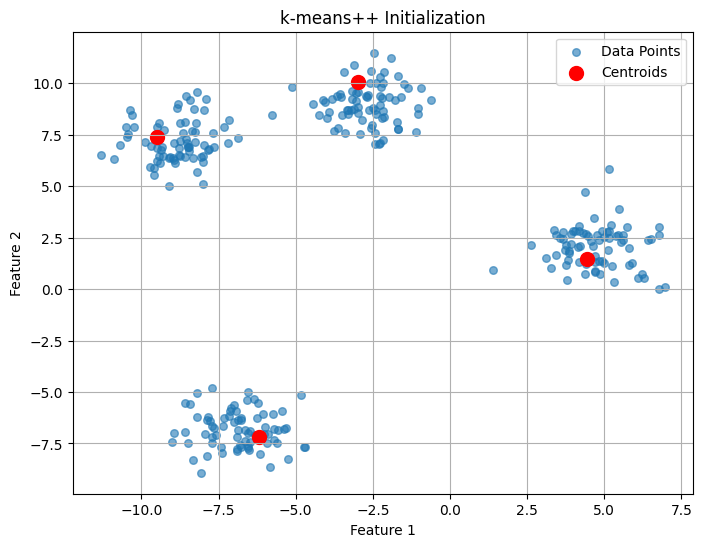

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

# Step 1: Generate synthetic data
def generate_data(n_samples=300, n_features=2, n_clusters=4, cluster_std=1.0, random_state=42):
    data, labels = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=cluster_std, n_features=n_features, random_state=random_state)
    return data

# Step 2: Implement k-means++ initialization
def kmeans_plus_plus(data, k, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = data.shape

    # Randomly select the first centroid
    centroids = [data[np.random.choice(range(n_samples))]]

    # Select the remaining k-1 centroids
    for _ in range(1, k):
        # Compute the distance from each point to the nearest centroid
        distances = np.min(cdist(data, np.array(centroids)), axis=1)
        probabilities = distances / distances.sum()

        # Choose the next centroid probabilistically
        next_centroid_idx = np.random.choice(range(n_samples), p=probabilities)
        centroids.append(data[next_centroid_idx])

    return np.array(centroids)

# Step 3: Plot the data and centroids for visualization
def plot_clusters(data, centroids, title="k-means++ Initialization"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=30, alpha=0.6, label="Data Points")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label="Centroids")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
n_samples = 300
n_features = 2
n_clusters = 4

# Generate data
data = generate_data(n_samples=n_samples, n_features=n_features, n_clusters=n_clusters)

# Perform k-means++ initialization
centroids = kmeans_plus_plus(data, n_clusters)

# Visualize results
plot_clusters(data, centroids, title="k-means++ Initialization")



In [5]:

import numpy as np
import pandas as pd

# Step 1: Generate synthetic data for movies
def generate_movie_data(n_movies=10, max_budget=100, max_popularity=5, max_views=50000, random_state=333):
    np.random.seed(random_state)
    budgets = np.random.randint(10, max_budget, size=n_movies)
    popularity = np.random.uniform(1, max_popularity, size=n_movies)
    views = (popularity * max_views / max_popularity).astype(int)
    movies = pd.DataFrame({
        "Movie_ID": range(1, n_movies + 1),
        "Budget": budgets,
        "Popularity": popularity,
        "Projected_Views": views
    })
    return movies

# Step 2: Dynamic programming approach for maximizing views
def maximize_views_with_budget(movies, total_budget):
    n_movies = len(movies)
    dp = np.zeros((n_movies + 1, total_budget + 1), dtype=int)

    for i in range(1, n_movies + 1):
        for b in range(1, total_budget + 1):
            if movies.loc[i - 1, "Budget"] > b:
                dp[i][b] = dp[i - 1][b]  # Exclude the movie
            else:
                # Include the movie and check maximum
                dp[i][b] = max(dp[i - 1][b],
                               dp[i - 1][b - movies.loc[i - 1, "Budget"]] + movies.loc[i - 1, "Projected_Views"])

    # Retrieve selected movies
    selected_movies = []
    b = total_budget
    for i in range(n_movies, 0, -1):
        if dp[i][b] != dp[i - 1][b]:  # If the movie is included
            selected_movies.append(movies.loc[i - 1, "Movie_ID"])
            b -= movies.loc[i - 1, "Budget"]

    return dp[n_movies][total_budget], selected_movies

# Step 3: Generate data and solve the problem
n_movies = 10
total_budget = 150

# Generate movie data
movies = generate_movie_data(n_movies=n_movies)

# Solve the optimization problem
max_views, selected_movies = maximize_views_with_budget(movies, total_budget)

max_views, selected_movies

(107327, [10, 8, 5, 1])

In [7]:
movies.sort_values(by='Projected_Views')

,Movie_ID,Budget,Popularity,Projected_Views
8,9,81,1.129436,11294
7,8,39,1.134617,11346
2,3,45,2.270715,22707
9,10,33,2.280310,22803
0,1,22,2.455686,24556
5,6,70,2.874055,28740
3,4,61,3.350593,33505
6,7,93,3.520203,35202
4,5,56,4.862282,48622
1,2,87,4.871972,48719


In [ ]:

# Step 1: Generate synthetic data for server programs
def generate_server_programs(n_programs=15, max_cpu=100, max_ram=200, random_state=333):
    np.random.seed(random_state)
    programs = pd.DataFrame({
        "Program_ID": range(1, n_programs + 1),
        "CPU_Usage": np.random.randint(5, max_cpu // 2, size=n_programs),
        "RAM_Usage": np.random.randint(10, max_ram // 2, size=n_programs),
        "Priority": np.random.uniform(1, 10, size=n_programs)  # Weight in the system
    })
    return programs

# Step 2: Greedy approach for resource allocation
def greedy_resource_allocation(programs, max_cpu, max_ram):
    # Calculate resource efficiency (CPU + RAM per unit of Priority)
    programs["Efficiency"] = (programs["CPU_Usage"] + programs["RAM_Usage"]) / programs["Priority"]
    programs = programs.sort_values(by="Efficiency")  # Sort by efficiency

    selected_programs = []
    total_cpu, total_ram = 0, 0

    for _, program in programs.iterrows():
        if total_cpu + program["CPU_Usage"] <= max_cpu and total_ram + program["RAM_Usage"] <= max_ram:
            selected_programs.append(program["Program_ID"])
            total_cpu += program["CPU_Usage"]
            total_ram += program["RAM_Usage"]

    return selected_programs, total_cpu, total_ram

# Correcting the data type for indexing in DP array (integer conversion)
def dp_resource_allocation(programs, max_cpu, max_ram):
    n_programs = len(programs)
    dp = np.zeros((n_programs + 1, max_cpu + 1, max_ram + 1), dtype=float)

    for i in range(1, n_programs + 1):
        program = programs.iloc[i - 1]
        cpu, ram, priority = int(program["CPU_Usage"]), int(program["RAM_Usage"]), program["Priority"]

        for c in range(max_cpu + 1):
            for r in range(max_ram + 1):
                if cpu > c or ram > r:
                    dp[i][c][r] = dp[i - 1][c][r]  # Exclude program
                else:
                    # Include program if resources allow
                    dp[i][c][r] = max(dp[i - 1][c][r],
                                      dp[i - 1][c - cpu][r - ram] + priority)

    # Backtrack to find selected programs
    selected_programs = []
    c, r = max_cpu, max_ram
    for i in range(n_programs, 0, -1):
        if dp[i][c][r] != dp[i - 1][c][r]:  # If program was included
            selected_programs.append(programs.iloc[i - 1]["Program_ID"])
            c -= int(programs.iloc[i - 1]["CPU_Usage"])
            r -= int(programs.iloc[i - 1]["RAM_Usage"])

    return selected_programs, dp[n_programs][max_cpu][max_ram]

# Parameters
n_programs = 300
max_cpu = 150
max_ram = 300

# Generate program data
programs = generate_server_programs(n_programs=n_programs)


({'Selected Programs (Greedy)': [46.0,
   109.0,
   111.0,
   82.0,
   32.0,
   80.0,
   209.0,
   228.0,
   102.0,
   60.0,
   58.0,
   172.0,
   81.0,
   84.0],
  'Total CPU Used': 149.0,
  'Total RAM Used': 252.0},
 {'Selected Programs (DP)': [266.0,
   239.0,
   228.0,
   209.0,
   146.0,
   111.0,
   109.0,
   102.0,
   88.0,
   82.0,
   80.0,
   60.0,
   58.0,
   46.0,
   32.0],
  'Total Priority Achieved': 124.56718385255489})

In [10]:
%%timeit
# Solve using greedy approach
greedy_selected, greedy_cpu, greedy_ram = greedy_resource_allocation(programs, max_cpu, max_ram)



# Display results
greedy_results = {
    "Selected Programs (Greedy)": greedy_selected,
    "Total CPU Used": greedy_cpu,
    "Total RAM Used": greedy_ram
}

greedy_results


291 ms ± 55.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
greedy_results

{'Selected Programs (Greedy)': [46.0,
  109.0,
  111.0,
  82.0,
  32.0,
  80.0,
  209.0,
  228.0,
  102.0,
  60.0,
  58.0,
  172.0,
  81.0,
  84.0],
 'Total CPU Used': 149.0,
 'Total RAM Used': 252.0}

In [12]:

%%time
# Solve using dynamic programming (corrected)
dp_selected, dp_priority = dp_resource_allocation(programs, max_cpu, max_ram)

dp_results = {
    "Selected Programs (DP)": dp_selected,
    "Total Priority Achieved": dp_priority
}



CPU times: user 1min 25s, sys: 423 ms, total: 1min 25s
Wall time: 1min 25s


{'Selected Programs (DP)': [266.0,
  239.0,
  228.0,
  209.0,
  146.0,
  111.0,
  109.0,
  102.0,
  88.0,
  82.0,
  80.0,
  60.0,
  58.0,
  46.0,
  32.0],
 'Total Priority Achieved': 124.56718385255489}

In [ ]:
dp_results

## KARATSUBA

In [8]:
def karatsuba(x, y):
    if x < 10 or y < 10:  # Базовий випадок
        return x * y

    n = max(len(str(x)), len(str(y)))
    m = n // 2

    a, b = divmod(x, 10**m)
    c, d = divmod(y, 10**m)

    ac = karatsuba(a, c)
    bd = karatsuba(b, d)
    ad_plus_bc = karatsuba(a + b, c + d) - ac - bd

    return ac * 10**(2*m) + ad_plus_bc * 10**m + bd

x, y = 123456789, 987654321



In [58]:
%%time

karatsuba(x, y)

CPU times: user 74 μs, sys: 3 μs, total: 77 μs
Wall time: 80.6 μs


121932631112635269

In [62]:
%%time

x * y

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 4.77 μs


121932631112635269